<a href="https://colab.research.google.com/github/minhduc9699/PhamMinhDuc-D4E18/blob/master/dantri_crawl_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crawl data from websites with Python

Các bước thực hiện:

1.   Xác định trang web và khu vực chưa dữ liệu cần lấy về
2.   Sử dụng thư viện requests để lấy được html của trang web
3.   Load html nhận được vào beautifulsoup để tiến hành bóc tách
4.   Từng bước bóc tách html, truy cập đến các thẻ chứa dữ liệu cần lấy
5.   Đóng gói và lưu dũ liệu

1.
    - Trong ví dụ này chúng ta sẽ chọn trang https://dantri.com.vn/ và vùng dữ liệu ở dưới để thực hành (tiêu đề và đường link của các bài báo trong mục tin tức sự kiện)

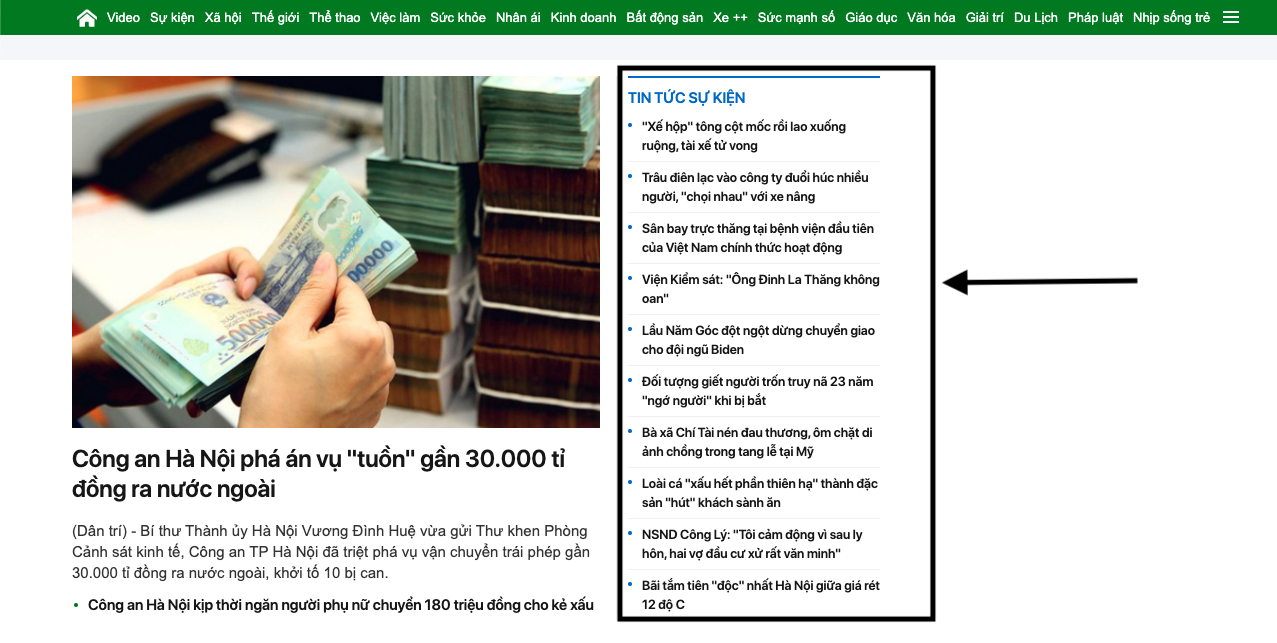

2.
    - Tiến hành cài đặt thư viện requests và beautifulsoup.
    - Mở terminal mà chạy lần lượt 2 lệnh cài đặt ở dưới

- ```pip install requests```
- ```pip install beautifulsoup4```

- Sau khi cài đặt xong chúng ta có thể import thư viện requests và beautifulsoup vào file code và sử dụng như sau

In [2]:
from requests import get
from bs4 import BeautifulSoup

 - Hàm get của thư viện requests sẽ giúp ta gửi requests đến server của trang web giống như cách trình duyệt làm, cách sử dụng như sau

In [ ]:
response = get('https://dantri.com.vn')
print(response.text)

- Lúc này dữ liệu trả về từ server dantri.com nằm ở trong biến ```response```. Trong biến trên có rất nhiều các loại dữ liệu khác nhau, để truy cập vào html của trang web, ta phải dùng ```response.text```
- Tiếp tục sử dụng hàm ```BeautifulSoup``` để tiến hành bóc tách

In [6]:
content_html = BeautifulSoup(response.text)

- Nếu ta in ra biến ```content_html``` ở trên thì nội dung nhận được vẫn sẽ giống với ```response.text```. Điểm khác biệt ở đây, là ta có thể sử dụng những hàm bóc tách của ```BeautifulSoup```
- Trước đó ta cần phải nắm được cú pháp cơ bản của html để truy cập được vào vũng dữ liệu cần lấy

- Dưới đây là 1 đoạn html cơ bản

>```<h1 class="header headline" id="highlighted">Hello world</h1>```

- Đây là tên gọi cho thành từng phần của đoạn html trên

>```<tag_name attribute_1="value1 value 2" attribute_2="value1">display_content</tag_name>```

- Một đoạn html phức tạp hơn một chút

>```<div><h1>Hello world</h1></div>```

- Ta thấy content của tag ```div``` lúc này lại là 1 đoạn html khác, cụ thể là tag tên ```h1```. Lúc này ta sẽ gọi tag ```div``` là tag chả của ```h1```, và ```h1``` là con của ```div```

- Hãy ghi nhớ cấu trúc html trên, chúng ta sẽ sử dụng ngay sau đây

In [15]:
headline_content_html = content_html.find('ul', {'class': 'dt-list'})
print(headline_content_html)

<ul class="dt-list dt-list--link">
<li>
<div class="news-item news-item--link">
<h2 class="news-item__title">
<a data-newstype="3" data-utm="Home|TTSK|1" href="/xa-hoi/ap-thap-nhiet-doi-kha-nang-thanh-bao-co-dien-bien-kha-phuc-tap-20201220105949420.htm">
                                        Áp thấp nhiệt đới khả năng thành bão có diễn biến khá phức tạp
                                    </a>
</h2>
</div>
</li>
<li>
<div class="news-item news-item--link">
<h2 class="news-item__title">
<a data-newstype="3" data-utm="Home|TTSK|2" href="/the-gioi/ong-trump-muon-bo-nhiem-cong-to-vien-dac-biet-dieu-tra-gian-lan-bau-cu-my-20201220085401543.htm">
                                        Ông Trump muốn bổ nhiệm công tố viên đặc biệt điều tra gian lận bầu cử Mỹ
                                    </a>
</h2>
</div>
</li>
<li>
<div class="news-item news-item--link">
<h2 class="news-item__title">
<a data-newstype="3" data-utm="Home|TTSK|3" href="/xa-hoi/bi-ket-luan-ke-khai-tai-san-khong-trung-th

- Đoạn code trên ta đã sử dụng lệnh ```.find()``` từ biến ```content_html``` để tìm ra tag html khớp với tham số đầu vào, trong đó: 
> - ```'ul'``` là tên của tag html cần tìm
> - ```{'class': 'dt-list'}``` là thông tin thêm của thẻ đó, cụ thể key `class` là attribute của tag ul, `dt-list` là value của attribute `class` đó

- kết quả ta nhận được là đoạn html của tag `ul` đó, và lưu vào biến `headline_content_html`

- Tiếp tục từ biến ```headline_content_html```, ta sẽ lấy tiếp các thẻ của chứa tiêu đề và link bài báo

In [ ]:
headers = headline_content_html.find_all('li')
print(headers)
print('-----------------------')
print(headers[0])

- Ở trên ta không dùng lệnh `find` nữa là dùng `find_all`, lý do là ở trong tag `ul` có rất nhiều tag `li`, các tag này không có attribute để phân biệt với nhau, nên ta dùng `find_all` để lấy ra được toàn bộ các tag `li`. Kiểu dữ liệu của biến headers lúc này là một list có chứa các tag html bên trong.

- Đã gần tới được nội dung cần lấy rồi, bây giờ ta sẽ dùng vòng lặp `for` để lần lượt truy cập vào các tag `li`

In [19]:
for header_html in headers:
  a_tag = header_html.find('a')
  title = a_tag.text
  link = a_tag['href']
  print(f'title: {title.strip()}, link: {link}')

title: Áp thấp nhiệt đới khả năng thành bão có diễn biến khá phức tạp, link: /xa-hoi/ap-thap-nhiet-doi-kha-nang-thanh-bao-co-dien-bien-kha-phuc-tap-20201220105949420.htm
title: Ông Trump muốn bổ nhiệm công tố viên đặc biệt điều tra gian lận bầu cử Mỹ, link: /the-gioi/ong-trump-muon-bo-nhiem-cong-to-vien-dac-biet-dieu-tra-gian-lan-bau-cu-my-20201220085401543.htm
title: "Bị kết luận kê khai tài sản không trung thực thì hậu quả khá là lớn", link: /xa-hoi/bi-ket-luan-ke-khai-tai-san-khong-trung-thuc-thi-hau-qua-kha-la-lon-20201219203212894.htm
title: Những cuộc chuyển giao quyền lực tổng thống sóng gió nhất lịch sử Mỹ, link: /the-gioi/nhung-cuoc-chuyen-giao-quyen-luc-tong-thong-song-gio-nhat-lich-su-my-20201220080600703.htm
title: Tử tù ma túy: Con ơi, bố xin lỗi!, link: /phap-luat/tu-tu-ma-tuy-con-oi-bo-xin-loi-20201219171616961.htm
title: Trời rét đậm, cảnh giác với bệnh lý gây chết người này, link: /suc-khoe/troi-ret-dam-canh-giac-voi-benh-ly-gay-chet-nguoi-nay-20201220101523641.htm
tit

- Với đoạn code ở trong vòng lặp ở trên, ta đã tìm tag `a` ở trong tag `li`, đây mới thực sự là thẻ chứa tiêu đề và link của các bài báo
- Sau đó ta dùng `a_tag.text` để lấy được content của tag này và lưu vào biến `title` - lúc này `title` có kiểu dữ liệu là string
- Còn với link của bài viết, ta cần truy cập vào attribute của tag `a` có tên là `href` (cú pháp giống với việc truy cập vào key trong dictionary)
- khi in ra kết quả ta dùng lệnh `.strip()` để loại bỏ các khoảng trắng ở đầu và ở cuối của đoạn string


- Vậy là chúng ta đã lấy được tiêu đề và link của các bài báo tiêu điểm trên dantri.com